In [2]:
%install_ext http://www.ipp.mpg.de/~mkraus/python/tikzmagic.py
%load_ext tikzmagic

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


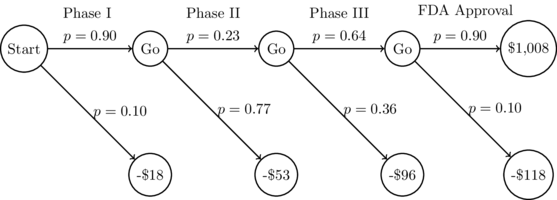

In [3]:
%%tikz -s 1000,200 -sc 3 -f png

\draw [thick] (1,1) node (a) [circle,draw] {Start};
\draw [thick] (2,1) node (b) [circle,draw] {Go} ++ (-0.5,0.2) node [above] {Phase I};
\draw [thick] (2,0) node (c) [circle,draw] {-\$18};
\draw [thick] (3,1) node (d) [circle,draw] {Go} ++ (-0.5,0.2) node [above] {Phase II};
\draw [thick] (3,0) node (e) [circle,draw] {-\$53};
\draw [thick] (4,1) node (f) [circle,draw] {Go} ++ (-0.5,0.2) node [above] {Phase III};
\draw [thick] (4,0) node (g) [circle,draw] {-\$96};
\draw [thick] (5,1) node (h) [circle,draw] {\$1,008} ++ (-0.5,0.2) node [above] {FDA Approval};
\draw [thick] (5,0) node (i) [circle,draw] {-\$118};

\draw [thick,->] (a) -- (b) node [midway,above] {$p = 0.90$};
\draw [thick,->] (a) -- (c) node [midway,right] {$p = 0.10$};
\draw [thick,->] (b) -- (d) node [midway,above] {$p = 0.23$};
\draw [thick,->] (b) -- (e) node [midway,right] {$p = 0.77$};
\draw [thick,->] (d) -- (f) node [midway,above] {$p = 0.64$};
\draw [thick,->] (d) -- (g) node [midway,right] {$p = 0.36$};
\draw [thick,->] (f) -- (h) node [midway,above] {$p = 0.90$};
\draw [thick,->] (f) -- (i) node [midway,right] {$p = 0.10$};


In [4]:
pI = 0.90
pII = 0.23
pIII = 0.64
pFDA = 0.90

ExpectedValue = pI*pII*pIII*pFDA*1008.0 \
    - pI*pII*pIII*(1-pFDA)*118 \
    - pI*pII*(1-pIII)*96 \
    - pI*(1-pII)*53 \
    - (1-pI)*18

print ExpectedValue

72.939672


In [8]:
import matplotlib.pyplot as plt
from scipy import stats

xk = [-118, -96, -53, -18, 1008]
pk = [pI*pII*pIII*(1-pFDA), pI*pII*(1-pIII), pI*(1-pII), 1-pI, pI*pII*pIII*pFDA]

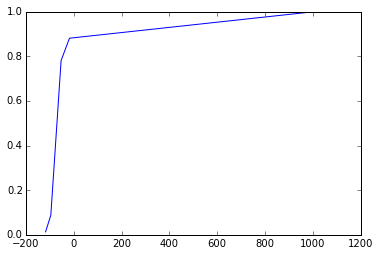

In [11]:
%matplotlib inline
p = stats.rv_discrete(name='fda', values=(xk,pk))
plt.plot(xk,p.cdf(xk))
